In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/data/FS_plots/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [4]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,800
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 4.353001117706299


Machine arg is, CH1


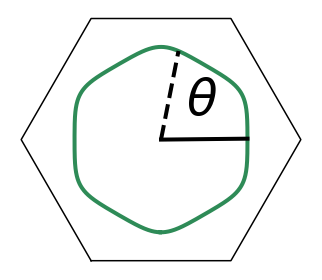

In [34]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################


import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
im=plot(KxFS,KyFS,c='seagreen', lw=4)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')

x=np.linspace(0,1,100)

point1=int(NpointsFS_pre/12 +2*NpointsFS_pre/3 +8)
# plt.scatter([KxFS[point1]],[KyFS[point1]])
plt.plot(KxFS[point1]*x,KyFS[point1]*x, lw=4, c='k')

point2=int(NpointsFS_pre/2 +30)

# plt.scatter([KxFS[point2]],[KyFS[point2]])
plt.plot(KxFS[point2]*x,KyFS[point2]*x, lw=4, c='k', ls='--')


plt.text(0.75,0.75,r'$\theta$', size=50)
plt.tight_layout()
plt.savefig("imgs/pap_fig_comp1.png", dpi=400)
